In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
# Function to Draw Hasse Diagram
def draw_hasse(poset_num, elements, cover_relations, title):
    G = nx.DiGraph()
    G.add_nodes_from(elements)
    G.add_edges_from(cover_relations)

    pos = nx.spring_layout(G)  # Approximate Layout
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, arrows=True)
    plt.title(title)
    plt.show()

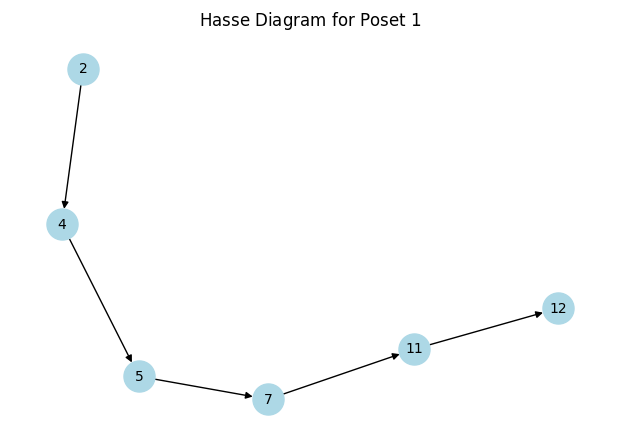

In [47]:
# Poset 1: ({2, 4, 5, 7, 11, 12}, ≤)
cover_relations_1 = [(2, 4),
                     (4, 5),
                     (5, 7),
                     (7, 11),
                     (11,12)]
draw_hasse(1, [2, 4, 5, 7, 11, 12], cover_relations_1, "Hasse Diagram for Poset $1$")

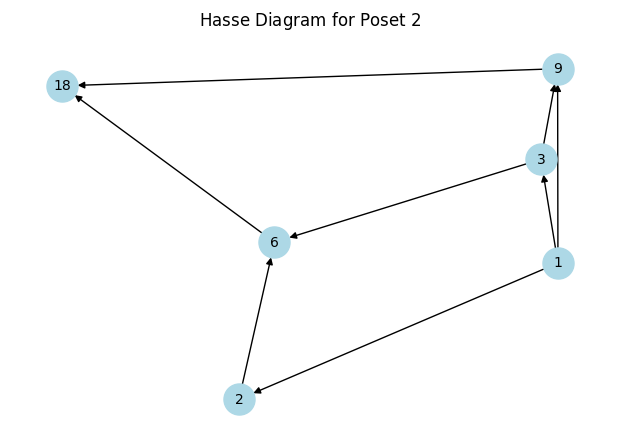

In [48]:
# Poset 2: ({1, 2, 3, 6, 9, 18}, |)
cover_relations_2 = [(1, 2), (1, 3), (1, 9),
                     (2, 6),
                     (3, 6), (3, 9),
                     (6, 18),
                     (9, 18)]
draw_hasse(2, [1, 2, 3, 6, 9, 18], cover_relations_2, "Hasse Diagram for Poset $2$")

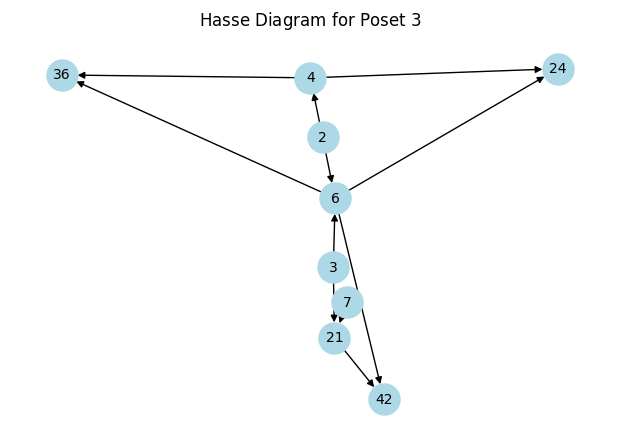

In [49]:
# Poset 3: ({2, 3, 4, 6, 7, 21, 24, 36, 42}, |)
cover_relations_3 = [(2, 4), (2, 6),
                     (3, 6), (3, 21),
                     (4, 24), (4, 36),
                     (6, 24), (6, 36), (6, 42),
                     (7, 21),
                     (21, 42),]
draw_hasse(3, [2, 3, 4, 6, 7, 21, 24, 36, 42], cover_relations_3, "Hasse Diagram for Poset $3$")

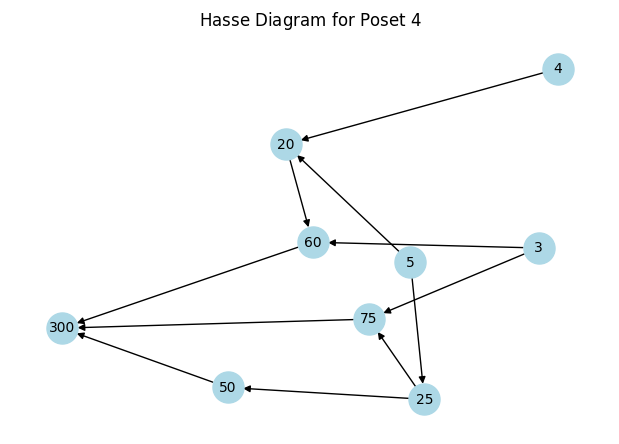

In [50]:
# Poset 4: ({3, 4, 5, 20, 25, 50, 60, 75, 300}, |)
cover_relations_4 = [(3, 60), (3, 75),
                     (4, 20),
                     (5, 20), (5, 25),
                     (20, 60),
                     (25, 50), (25, 75),
                     (50, 300),
                     (60, 300),
                     (75, 300)]
draw_hasse(4, [3, 4, 5, 20, 25, 50, 60, 75, 300], cover_relations_4, "Hasse Diagram for Poset $4$")

In [51]:
# Define Set A
A = [2, 3, 4, 5, 6, 7, 8]
n = len(A)

In [52]:
# Initialize Binary Matrix
matrix = np.zeros((n, n), dtype=int)

# Fill Matrix: xRy iff (x - y) % 3 == 0
for i in range(n):
    for j in range(n):
        if (A[i] - A[j]) % 3 == 0:
            matrix[i][j] = 1

matrix

array([[1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 1]])

In [53]:
Q = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])

R = np.array([
    [1, 0, 0, 1],
    [0, 1, 0, 1]
])

S = np.array([
    [0, 1],
    [1, 0]
])

In [54]:
# a) MR∘Q = MQ * MR
MRoQ = Q @ R
MRoQ

array([[1, 0, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 2]])

In [55]:
# b) MS∘Q = MQ * MS
MSoQ = Q @ S
MSoQ

array([[0, 1],
       [1, 0],
       [1, 1]])

In [56]:
# c) MS∘R^−1 = MR^T * MS
R_inv = R.T
MSoR_inv = R_inv @ S
MSoR_inv

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1]])

In [57]:
# Define Sets A, R, and S
A = {1, 2, 3, 4, 5}

# R: (a, b) Where b Divides a
R = {(1, 1), (1,2), (1,3), (1,4), (1,5),
     (2, 2), (2, 4), (3, 3), (4, 4), (5, 5)}

# S: Defined Directly
S = {(2, 1), (2, 3), (3, 4), (3, 5), (4, 5)}

In [58]:
# Compute S ∘ R
S_o_R = set()
for (a, b) in R:
    for (b2, c) in S:
        if b == b2:
            S_o_R.add((a, c))

S_o_R

{(1, 1),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)}

In [59]:
# Domain of S∘R
domain_SoR = {x for (x, _) in S_o_R}
domain_SoR

{1, 2, 3, 4}

In [60]:
# Range of S∘R
range_SoR = {y for (_, y) in S_o_R}
range_SoR

{1, 3, 4, 5}

In [61]:
# Inverse of S∘R
S_o_R_inv = {(y, x) for (x, y) in S_o_R}

S_o_R_inv

{(1, 1),
 (1, 2),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 3),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4)}

In [62]:
# A x A (Universal Relation on A)
AxA = {(x, y) for x in A for y in A}

# Complement of S∘R
S_o_R_complement = AxA - S_o_R

S_o_R_complement

{(1, 2),
 (2, 2),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)}

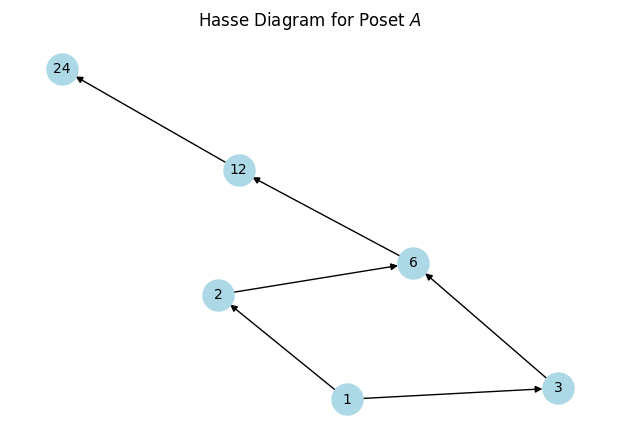

In [63]:
# Poset A: ({1, 2, 3, 6, 12, 24}, | )
cover_relations_a = [(1, 2), (1, 3),
                     (2, 6),
                     (3, 6),
                     (6, 12),
                     (12, 24)]
draw_hasse(a, [1, 2, 3, 6, 12, 24], cover_relations_a, "Hasse Diagram for Poset $A$")

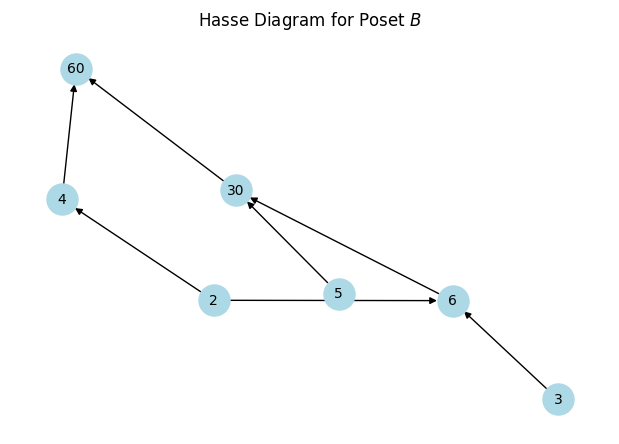

In [64]:
# Poset B: ({2, 3, 4, 5, 6, 30, 60}, | )
cover_relations_b = [(2, 4), (2, 6),
                     (3, 6),
                     (4, 60),
                     (5, 30),
                     (6, 30),
                     (30, 60)]
draw_hasse(b, [2, 3, 4, 5, 6, 30, 60], cover_relations_b, "Hasse Diagram for Poset $B$")

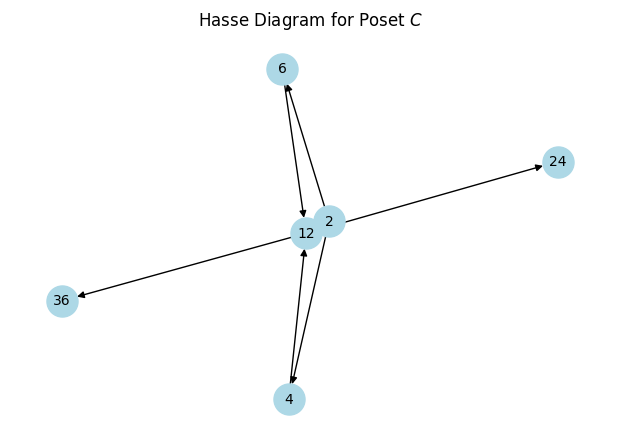

In [65]:
# Poset C: ({2, 4, 6, 12, 24, 36}, | )
cover_relations_c = [(2, 4), (2, 6),
                     (4, 12),
                     (6, 12),
                     (12, 24), (12, 36)]
draw_hasse(c, [2, 4, 6, 12, 24, 36], cover_relations_c, "Hasse Diagram for Poset $C$")